# Tugas Besar IF2220 Probabilitas dan Statistika: Penarikan Kesimpulan dan Pengujian Hipotesis

## Nomor 3

Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
# Membaca data dan melihat beberapa data pertama
df = pd.read_csv('water_potability.csv', index_col=0)
df.head()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
id,,,,,,,,,,
1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [3]:
# Menyatakan kolom-kolom numerik
col_numeric = [
    'pH', 
    'Hardness', 
    'Solids', 
    'Chloramines', 
    'Sulfate', 
    'Conductivity', 
    'OrganicCarbon', 
    'Trihalomethanes', 
    'Turbidity'
]

In [4]:
def histogram_vs_normal(axs, data):
    # Density Histogram
    axs.hist(data, density=True)
    _mean, _std = norm.fit(data)
    x_axis = np.linspace(_mean - 3 * _std, _mean + 3 * _std, 100)
    # Normal Curve
    axs.plot(x_axis, norm.pdf(x_axis, _mean, _std))

def histogram_vs_normal_col_name(col_names, df):
    # Hitung banyak kolom data dan bagi subplot sehingga memiliki 2 kolom
    col_num = len(col_names)
    fig, axs = plt.subplots(col_num // 2 + 1, 2, figsize=(16, 3 * col_num))
    # Isi tiap subplot
    for idx, col_name in enumerate(col_names):
        _col = idx // 2
        _row = idx % 2
        histogram_vs_normal(
            axs[_col][_row], 
            df[col_name]
        )
        axs[_col][_row].set_title(f"Density Histogram vs Normal Curve: {col_name}")
    # Jika jumlah kolomnya ganjil, perlu dihapus plot terakhir
    if col_num % 2 == 1:
        fig.delaxes(axs[col_num // 2][1])
    return fig, axs

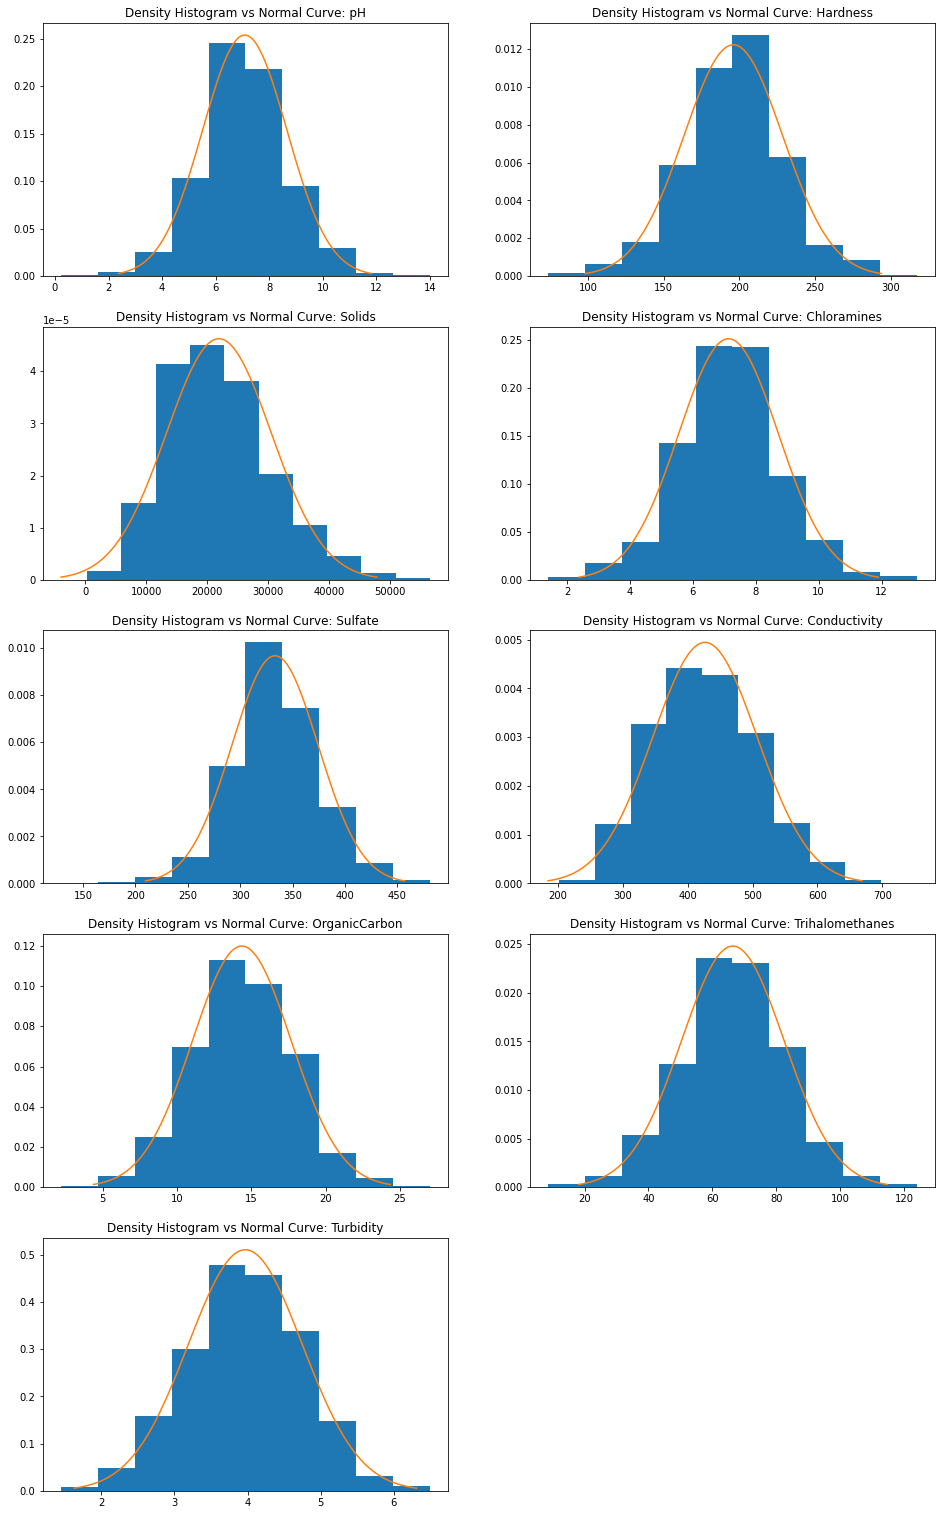

In [5]:
fig, axs = histogram_vs_normal_col_name(col_numeric, df[col_numeric])

### Kesimpulan

Dapat dilihat dari *plot*-*plot* diatas bahwa kesembilan kolom dari data mengikuti distribusi normal.